## Decision Tree

In [1]:
import pandas as pd
df = pd.read_csv("abalone_dataset.csv")
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
x = df.drop('sex',axis = 1)
y = df['sex']

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)  # F - 0  I - 1 M - 2

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 5)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
from sklearn.tree import export_graphviz
# from IPython.display import Image
export_graphviz(tree_clf,out_file = "abalone_tree.dot",feature_names = df.columns[1:],
                class_names = ['M','F','I'],rounded = True,filled = True)

C:\Users\IIIT-rgukt\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


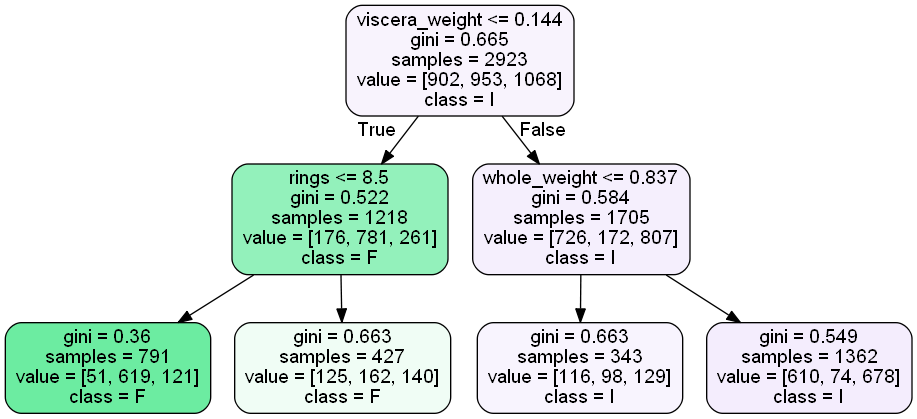

In [7]:
import os
os.environ["PATH"]+=os.environ['PATH']+';'+r'C:\Users\IIIT-rgukt\Anaconda3\Library\bin\graphviz-2.38\release\bin'
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf,out_file = dot_data,filled = True,rounded = True,feature_names = df.columns[1:],class_names = ['M','F','I'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [8]:
y_pred = tree_clf.predict(x_test)

In [9]:
tree_clf.predict([[0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10]])

array([1])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5255183413078149

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predict = rfc.predict(x_test)

C:\Users\IIIT-rgukt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
rfc.predict([[0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7]])

array([1])

In [14]:
rfc.predict([[0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10]])

array([2])

In [16]:
rfc.predict([[0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9]])

array([0])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.5406698564593302